In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import re
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
fname=[]
lname=[]
age=[]
zcode=[]
college=[]
interest=[]
num_interest=[]
politic=[]
num_politic=[]
ind=0
f=open('dataset.txt','r')
cnt=1

def interest_map(hobby):
    if hobby=='Gaming':
        return 1
    elif hobby=='Reading':
        return 2
    elif hobby=='Art':
        return 3
    elif hobby=='Fashion':
        return 4 
    elif hobby=='Music':
        return 5 
    elif hobby=='Cooking':
        return 6
    elif hobby=='Nature':
        return 7
    elif hobby=='Travel':
        return 8
    elif hobby=='Fitness':
        return 9 
    elif hobby=='Sports':
        return 10
for line in f:
    if (ind==0):
        name=re.split(', ', line)
        lname.append(name[0])
        fname.append(name[1].strip())
    elif (ind==4):
        age.append(line.strip())
    elif (ind==5):
        college.append(line.strip())
    elif (ind==6):
        zcode.append(line.strip())
    elif (ind==7):
        interest.append(line.strip())
        num_interest.append(interest_map(line.strip()))
    elif (ind==8):
        party=re.split('[()]',line)
        politic.append(party[0])
        num_politic.append(party[1].strip())
    if (line=="------------------------------\n"):
        ind=0
        cnt=cnt+1
    else:
        ind=ind+1

    
df=pd.DataFrame(list(zip(fname, lname, age, zcode, college,interest, num_interest, politic, num_politic)), columns=['First Name', 'Last Name', 'Age', 'Zipcode', 'College', 'Interest', 'Interest Map','Political Views', 'Political Views Map'])
    
df
        

,First Name,Last Name,Age,Zipcode,College,Interest,Interest Map,Political Views,Political Views Map
0,Winfield,Griffith,47,37064,Earlham College,Reading,2,Right,0.42
1,Isabella,Lee,38,95355,Loyola University Chicago,Cooking,6,Right Leaning,0.3
2,Jerry,Franklin,59,78664,Meridian College,Gaming,1,Far Right,0.72
3,Eddie,Carrillo,55,77479,Ilisagvik College,Cooking,6,Left,-0.55
4,Fannie,Ruiz,58,19124,Southern Connecticut State University,Travel,8,Right,0.54
...,...,...,...,...,...,...,...,...,...
1995,Marshall,Contreras,54,33142,Ball State University,Gaming,1,Right Leaning,0.06
1996,Silas,Norris,45,60657,Western Colorado University,Reading,2,Far Right,0.74
1997,Alberta,Black,43,60073,Middle Georgia State University,Nature,7,Left,-0.67
1998,Dora,Banks,20,63376,Santa Clara University,Art,3,Left,-0.69


In [15]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['Age','Zipcode', 'Interest Map', 'Political Views Map']])
df_scale = pd.DataFrame(scale, columns = ['Age','Zipcode', 'Interest', 'Political Views']);
df_scale

,Age,Zipcode,Interest,Political Views
0,0.707317,0.368046,0.111111,0.710
1,0.487805,0.956594,0.555556,0.650
2,1.000000,0.788070,0.000000,0.860
3,0.902439,0.776105,0.555556,0.225
4,0.975610,0.186911,0.777778,0.770
...,...,...,...,...
1995,0.878049,0.328447,0.000000,0.530
1996,0.658537,0.606258,0.111111,0.870
1997,0.609756,0.600361,0.666667,0.165
1998,0.048780,0.633711,0.222222,0.155


In [16]:
km=KMeans(n_clusters=400)
relationship_predicted=km.fit_predict(df_scale[['Age','Zipcode', 'Interest', 'Political Views']])


,First Name,Last Name,Age,Zipcode,College,Interest,Interest Map,Political Views,Political Views Map,Clusters
0,Winfield,Griffith,47,37064,Earlham College,Reading,2,Right,0.42,223
1,Isabella,Lee,38,95355,Loyola University Chicago,Cooking,6,Right Leaning,0.3,174
2,Jerry,Franklin,59,78664,Meridian College,Gaming,1,Far Right,0.72,32
3,Eddie,Carrillo,55,77479,Ilisagvik College,Cooking,6,Left,-0.55,51
4,Fannie,Ruiz,58,19124,Southern Connecticut State University,Travel,8,Right,0.54,42
...,...,...,...,...,...,...,...,...,...,...
1995,Marshall,Contreras,54,33142,Ball State University,Gaming,1,Right Leaning,0.06,355
1996,Silas,Norris,45,60657,Western Colorado University,Reading,2,Far Right,0.74,220
1997,Alberta,Black,43,60073,Middle Georgia State University,Nature,7,Left,-0.67,80
1998,Dora,Banks,20,63376,Santa Clara University,Art,3,Left,-0.69,217


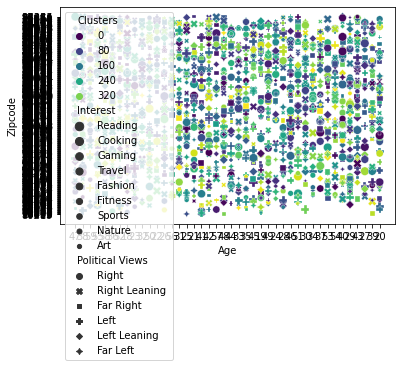

In [26]:
df['Clusters'] = km.labels_
sns.scatterplot(x="Age", y="Zipcode", hue = 'Clusters', size="Interest", style="Political Views", data=df,palette='viridis')
df

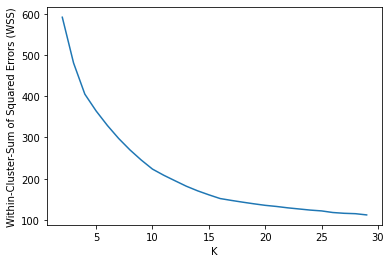

In [25]:
K=range(2,30)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [55]:
print("Enter the name of the person you wish to find friend suggestions for")
name=input()
fir_name=name.split()[0]
las_name=name.split()[1]
clu_num=0


clu_num=df.loc[(df['First Name']==fir_name) & (df['Last Name']==las_name)]
c_num=clu_num.iloc[0]['Clusters']

recs=df.loc[df['Clusters']==c_num]
recs


Enter the name of the person you wish to find friend suggestions for
Jerry Franklin


,First Name,Last Name,Age,Zipcode,College,Interest,Interest Map,Political Views,Political Views Map,Clusters
2,Jerry,Franklin,59,78664,Meridian College,Gaming,1,Far Right,0.72,32
42,Virgil,Glover,57,76244,Loyola Marymount University,Reading,2,Right,0.59,32
1256,Martin,Rice,55,76010,Chicago State University,Reading,2,Far Right,0.75,32
1836,Kathryn,Hale,58,78596,Florida Polytechnic University,Reading,2,Right,0.44,32


In [63]:
r_names=[]
j=0
for i in recs.iterrows():
    r_names.append(recs.iloc[j]['First Name']+" " + recs.iloc[j]['Last Name'])     
    j=j+1
r_names.remove(name)
r_names

['Virgil Glover', 'Martin Rice', 'Kathryn Hale']